# Rendering and Animation

In [6]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
import numpy as np
import pandas as pd 
current_folder = Path.cwd()
parent_folder = current_folder.parent.parent
sys.path.insert(0, str(parent_folder))
print(parent_folder)

from rplh.rendering.render_state import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/kevinb/Desktop/dsc190/RPLH


# Rendering of States

In [7]:
import os
import json

directory = parent_folder / "demos/example_runs/rplh_agent_3x3/response"
action_list_raw = []

for i in range(10):
    file_path = os.path.join(directory, f'response{i}.json')
    with open(file_path, 'r') as file:
        action_list_raw.append(json.load(file))
action_list_raw

[{'Agent[0.5, 0.5]': 'move(box_blue, target_blue)',
  'Agent[2.5, 1.5]': 'move(box_purple, target_purple)'},
 {'Agent[0.5, 0.5]': 'move(box_green, square[0.5, 1.5])',
  'Agent[1.5, 2.5]': 'move(box_orange, square[1.5, 1.5])',
  'Agent[2.5, 0.5]': 'move(box_red, square[1.5, 0.5])'},
 {},
 {'Agent[0.5, 1.5]': 'move(box_green, square[1.5, 1.5])',
  'Agent[1.5, 0.5]': 'move(box_red, target_red)'},
 {},
 {'Agent[1.5, 1.5]': 'move(box_orange, square[0.5, 1.5])',
  'Agent[1.5, 0.5]': 'move(target_orange, square[1.5, 1.5])'},
 {},
 {'Agent[0.5, 1.5]': 'move(box_orange, square[1.5, 1.5])',
  'Agent[1.5, 1.5]': 'move(box_green, square[1.5, 2.5])'},
 {'Agent[1.5, 1.5]': 'move(box_orange, target_orange)',
  'Agent[1.5, 2.5]': 'move(box_green, square[2.5, 2.5])'},
 {'Agent[2.5, 2.5]': 'move(box_green, target_green)'}]

In [8]:
pg_state_0 = {"0.5_0.5": ["box_blue", "target_blue", "box_green"], "0.5_1.5": [], "0.5_2.5": [], "1.5_0.5": ["target_red", "target_orange"], "1.5_1.5": [], "1.5_2.5": ["box_orange"], "2.5_0.5": ["box_red"], "2.5_1.5": ["box_purple", "target_purple"], "2.5_2.5": ["target_green"]}
box_map, action_list = trans_data(pg_state_0, action_list_raw)
print("box map:", box_map)
print("-------------------------------------------------------------------------------------------")
print("action_list:", action_list)


box map: {(0.5, 0.5): [['box', 'blue', 0], ['target', 'blue', 1], ['box', 'green', 2]], (0.5, 1.5): [], (0.5, 2.5): [], (1.5, 0.5): [['target', 'red', 3], ['target', 'orange', 4]], (1.5, 1.5): [], (1.5, 2.5): [['box', 'orange', 5]], (2.5, 0.5): [['box', 'red', 6]], (2.5, 1.5): [['box', 'purple', 7], ['target', 'purple', 8]], (2.5, 2.5): [['target', 'green', 9]]}
-------------------------------------------------------------------------------------------
action_list: [{(0.5, 0.5): ('box_blue', 'target_blue'), (2.5, 1.5): ('box_purple', 'target_purple')}, {(0.5, 0.5): ('box_green', (0.5, 1.5)), (1.5, 2.5): ('box_orange', (1.5, 1.5)), (2.5, 0.5): ('box_red', (1.5, 0.5))}, {}, {(0.5, 1.5): ('box_green', (1.5, 1.5)), (1.5, 0.5): ('box_red', 'target_red')}, {}, {(1.5, 1.5): ('box_orange', (0.5, 1.5)), (1.5, 0.5): ('target_orange', (1.5, 1.5))}, {}, {(0.5, 1.5): ('box_orange', (1.5, 1.5)), (1.5, 1.5): ('box_green', (1.5, 2.5))}, {(1.5, 1.5): ('box_orange', 'target_orange'), (1.5, 2.5): ('box_g

# Rendering Actions + States

In [9]:
import os
current_folder = Path.cwd()
parent_folder = current_folder.parent.parent
os.chdir(parent_folder)
print(parent_folder)

/Users/kevinb/Desktop/dsc190/RPLH


In [10]:
render_graph(box_map, pg_row_num=3, pg_column_num=4)

# Rendering Animations

In [11]:
fig, df = render_animate(box_map, action_list, num_frames = 2)

In [12]:
fig.show()

export as html

In [89]:
fig.write_html("render_experience_1.html")

# Rendering Multiple Environments

In [103]:
# List to store test directories
tests = []
test_initial_states_raw = []
test_action_raw = {}

# Define the path to the 'tests' directory
demos_path = os.path.join(os.getcwd(), 'tests')
print(f"Demos path: {demos_path}")

# Collect all 'trial' directories
for trial in range(2, 6):
    directory = os.path.join(demos_path, f"trial{trial}")
    tests.append(directory)

# List contents of each 'trial' directory
count = 2
for test in tests:
    print(f"\nContents of {test}:")
    inital_state_file = os.path.join(test, 'pg_state0.json')
    with open(inital_state_file, 'r') as inital_state:
        test_initial_states_raw.append(json.load(inital_state))
        
    action_list_path = os.path.join(test, 'response')
    test_action_raw[count] = []
    for action in os.listdir(action_list_path):
        action_path = os.path.join(action_list_path, action)
        with open(action_path, 'r') as action:
            test_action_raw[count].append(json.load(action))

    count += 1
print(test_initial_states_raw)
print(test_action_raw)

Demos path: C:\Users\huang\Multi-Agency\RPLH_new\RPLH\demos\tests

Contents of C:\Users\huang\Multi-Agency\RPLH_new\RPLH\demos\tests\trial2:

Contents of C:\Users\huang\Multi-Agency\RPLH_new\RPLH\demos\tests\trial3:

Contents of C:\Users\huang\Multi-Agency\RPLH_new\RPLH\demos\tests\trial4:

Contents of C:\Users\huang\Multi-Agency\RPLH_new\RPLH\demos\tests\trial5:
[{'0.5_0.5': ['box_blue', 'target_blue', 'target_green'], '0.5_1.5': ['box_red', 'box_green'], '1.5_0.5': ['target_red', 'target_orange'], '1.5_1.5': ['box_purple', 'target_purple', 'box_orange']}, {'0.5_0.5': ['box_red', 'target_red'], '0.5_1.5': ['box_blue', 'target_green', 'box_orange', 'target_orange'], '1.5_0.5': ['target_blue', 'box_green'], '1.5_1.5': ['box_purple', 'target_purple']}, {'0.5_0.5': ['target_blue', 'box_green', 'target_green', 'target_purple'], '0.5_1.5': ['target_red'], '1.5_0.5': ['box_blue', 'box_purple', 'box_orange', 'target_orange'], '1.5_1.5': ['box_red']}, {'0.5_0.5': ['target_blue', 'target_red', 

In [106]:
test_initial_states_raw[0]

{'0.5_0.5': ['box_blue', 'target_blue', 'target_green'],
 '0.5_1.5': ['box_red', 'box_green'],
 '1.5_0.5': ['target_red', 'target_orange'],
 '1.5_1.5': ['box_purple', 'target_purple', 'box_orange']}

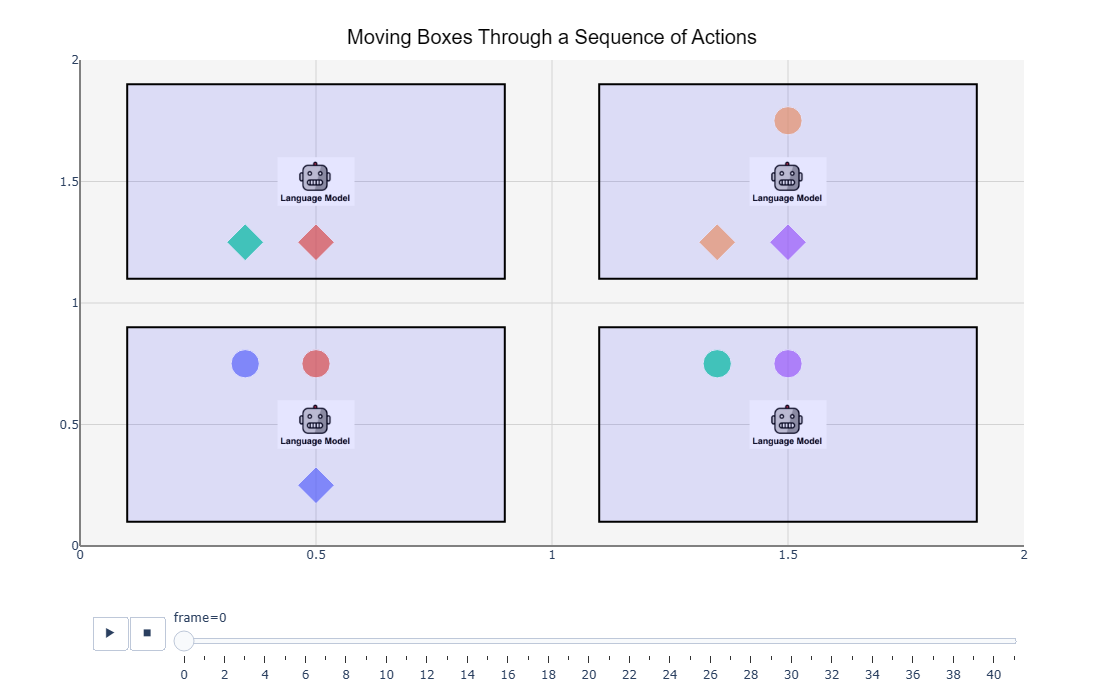

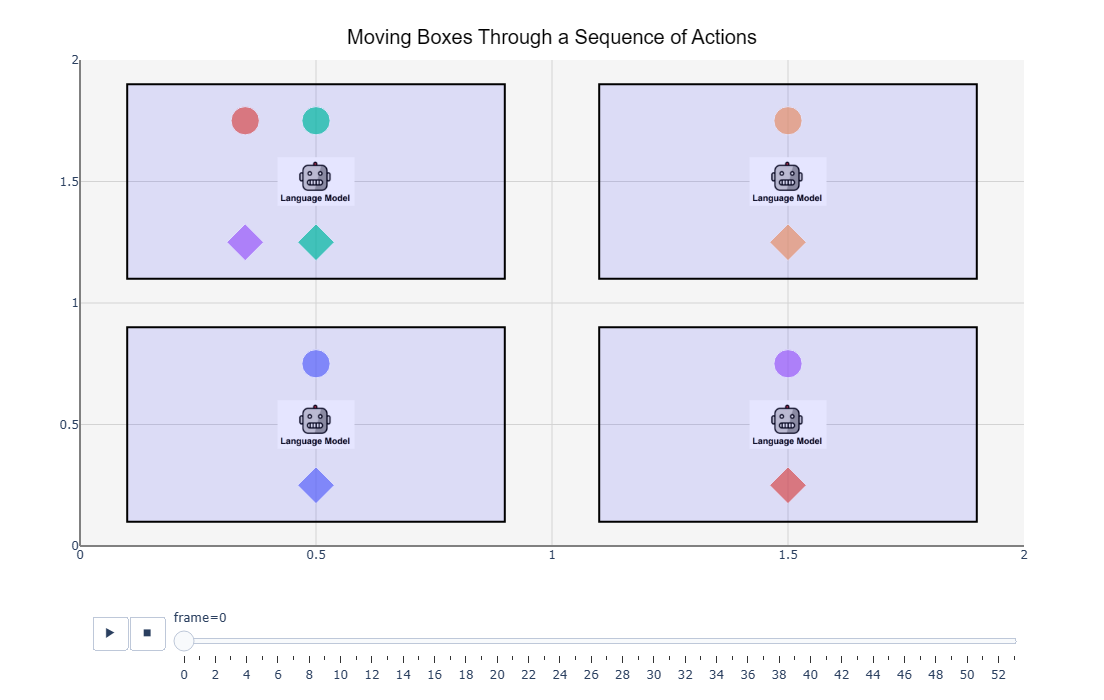

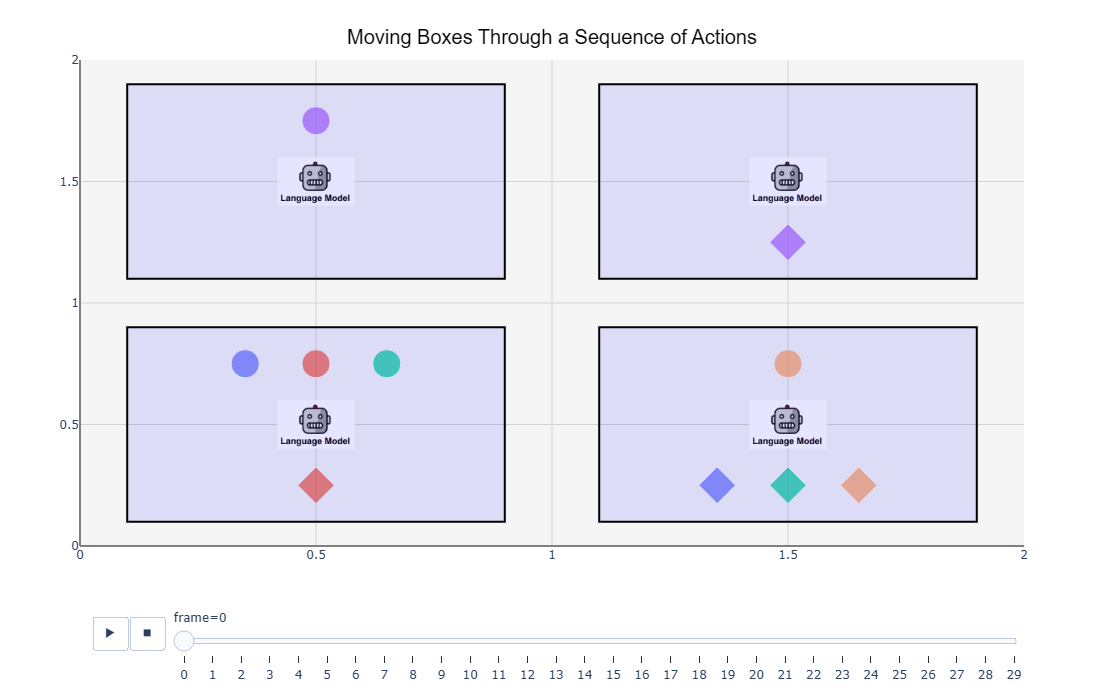

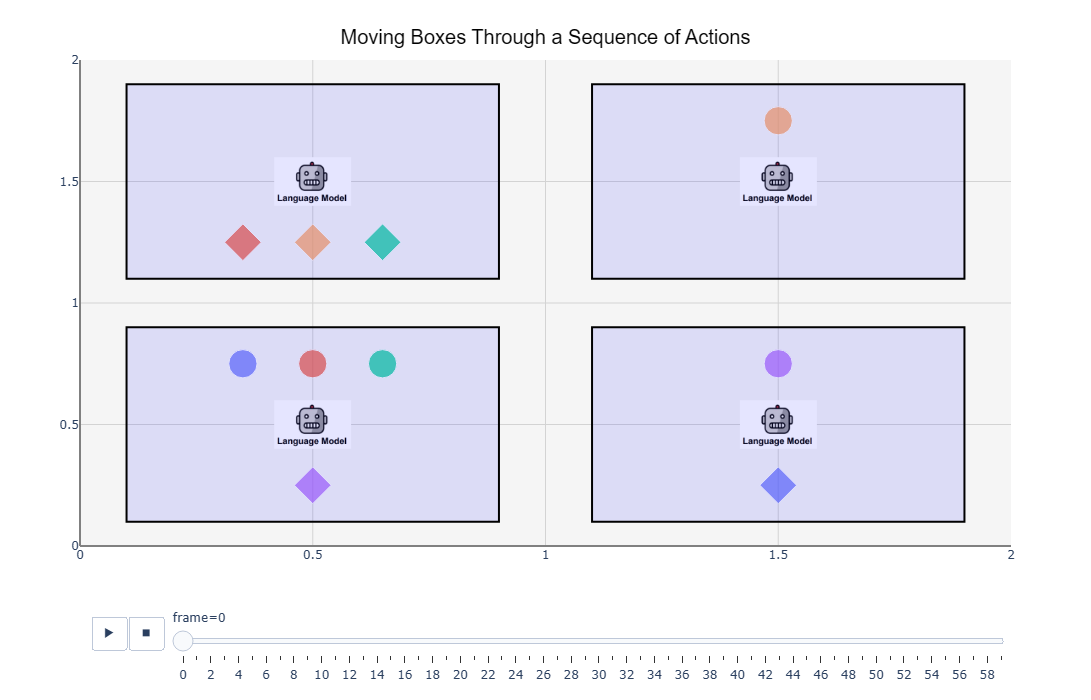

In [117]:
for i in range(4):
    box_map, action_list = trans_data(test_initial_states_raw[i], test_action_raw[i + 2])
    chart, df = render_animate(box_map, action_list, num_frames=5)
    chart.show()
    chart.write_html(f"render_test_{i}.html")